In [1]:
import pandas as pd
import matplotlib as plt
import os
import numpy as np
import plotly.express as px
import scipy.stats as sts
from sklearn import datasets
import statsmodels.api as sm
from datetime import datetime

In [2]:
accident_df=pd.read_csv("Resources/accident-data.csv")
accident_df.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   
2                  3                   1                     1  01/01/2020   
3                  2                   1                     1  01/01/2020   
4                  3                   1                     2  01/01/2020   

   day_of_week  ... second_road_class  second_road_number  \
0            3  ...                 6                   0   
1            2  ...                 6                   0   
2            4  ...                 6                   0   
3            4  ...                 6                   0   
4            4  ...                 5                   0   

   pedestrian_crossing_human_control  pedestrian_crossing_physical_facilities  \
0                                  9                                        9   
1                                  0                                        4   
2                                  0                                        0   
3                                  0                                        4   
4                                  0                                        0   

   light_conditions  weather_conditions  road_surface_conditions  \
0                 1                   9                        9   
1                 1                   1                        1   
2                 4                   1                        2   
3                 4                   1                        1   
4                 4                   1                        1   

   special_conditions_at_site  carriageway_hazards  urban_or_rural_area  
0                           0                    0                    1  
1                           0                    0                    1  
2                           0                    0                    1  
3                           0                    0                    1  
4                           0                    0                    1  

[5 rows x 27 columns]

In [3]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [4]:
accident_df.loc[accident_df['longitude'].isnull(), 'longitude'] = 0
accident_df.loc[accident_df['latitude'].isnull(), 'latitude'] = 0

In [5]:
cleaned = accident_df.drop(columns=["accident_year","accident_reference"])

In [6]:
cleaned.loc[cleaned["accident_severity"] ==3,"severity"] = "Slight"
cleaned.loc[cleaned["accident_severity"] ==2,"severity"] = "Serious"
cleaned.loc[cleaned["accident_severity"] ==1,"severity"] = "Fatal"

In [7]:
cleaned.loc[cleaned["road_surface_conditions"] ==1,"road_surface"] = "Dry"
cleaned.loc[cleaned["road_surface_conditions"] ==2,"road_surface"] = "Wet or damp"
cleaned.loc[cleaned["road_surface_conditions"] ==3,"road_surface"] = "Snow"
cleaned.loc[cleaned["road_surface_conditions"] ==4,"road_surface"] = "Frost or ice"
cleaned.loc[cleaned["road_surface_conditions"] ==5,"road_surface"] = "Flood over 3cm. deep"
cleaned.loc[cleaned["road_surface_conditions"] ==6,"road_surface"] = "Oil or diesel"
cleaned.loc[cleaned["road_surface_conditions"] ==7,"road_surface"] = "Mud"
cleaned.loc[cleaned["road_surface_conditions"] ==-1,"road_surface"] = "Data missing or out of range"
cleaned.loc[cleaned["road_surface_conditions"] ==9,"road_surface"] = "unknown (self reported)"

In [8]:
#grouping time by the hour
cleaned['time'] = pd.to_datetime(cleaned['time'])
cleaned['time by hour'] = cleaned['time'].dt.floor('H')
cleaned['time by hour'] = [time.time() for time in cleaned['time by hour']]
cleaned['time'] = [time.time() for time in cleaned['time']]

In [10]:
cleaned

accident_index  longitude   latitude  accident_severity  \
0      2020010219808  -0.254001  51.462262                  3   
1      2020010220496  -0.139253  51.470327                  3   
2      2020010228005  -0.178719  51.529614                  3   
3      2020010228006  -0.001683  51.541210                  2   
4      2020010228011  -0.137592  51.515704                  3   
...              ...        ...        ...                ...   
91194  2020991027064  -2.926320  56.473539                  2   
91195  2020991029573  -4.267565  55.802353                  3   
91196  2020991030297  -2.271903  57.186317                  2   
91197  2020991030900  -3.968753  55.950940                  3   
91198  2020991032575  -4.561040  56.003843                  3   

       number_of_vehicles  number_of_casualties        date  day_of_week  \
0                       1                     1  04/02/2020            3   
1                       1                     2  27/04/2020            2   
2                       1                     1  01/01/2020            4   
3                       1                     1  01/01/2020            4   
4                       1                     2  01/01/2020            4   
...                   ...                   ...         ...          ...   
91194                   2                     1  12/08/2020            4   
91195                   1                     1  13/11/2020            6   
91196                   2                     1  15/04/2020            4   
91197                   2                     1  15/12/2020            3   
91198                   1                     1  25/08/2020            3   

           time  first_road_class  ...  \
0      09:00:00                 6  ...   
1      13:55:00                 3  ...   
2      01:25:00                 5  ...   
3      01:50:00                 3  ...   
4      02:25:00                 3  ...   
...         ...               ...  ...   
91194  14:30:00                 4  ...   
91195  15:05:00                 6  ...   
91196  12:42:00                 4  ...   
91197  14:00:00                 6  ...   
91198  13:50:00                 6  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            9                 1   
1                                            4                 1   
2                                            0                 4   
3                                            4                 4   
4                                            0                 4   
...                                        ...               ...   
91194                                        0                 1   
91195                                        0                 1   
91196                                        0                 1   
91197                                        0                 1   
91198                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
1                       1                        1   
2                       1                        2   
3                       1                        1   
4                       1                        1   
...                   ...                      ...   
91194                   1                        1   
91195                   1                        1   
91196                   1                        1   
91197                   1                        1   
91198                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                               0                    0                    1   
1                               0                    0                    1   
2                               0                    0                    1   
3                        

In [11]:
fig = px.bar(cleaned['time by hour'], color = cleaned["accident_severity"])
fig.show()

In [15]:
fig = px.histogram(cleaned['time by hour'].sort_values(), color = cleaned["accident_severity"])
fig.show()

In [13]:
#Grouping date by month
s = pd.to_datetime(pd.Series(cleaned["date"]), format='%d/%m/%Y')
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)
print (s)

2020-01    9591
2020-02    8546
2020-03    6551
2020-04    3298
2020-05    5599
2020-06    6721
2020-07    8157
2020-08    8875
2020-09    9258
2020-10    8865
2020-11    7610
2020-12    8128
Freq: M, Name: date, dtype: int64


<AxesSubplot:>

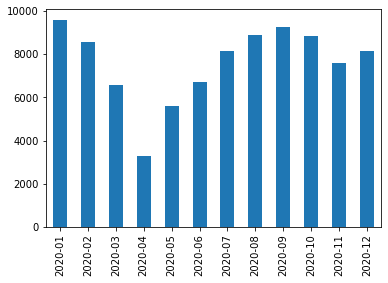

In [14]:
#Plot accidents by month
s.plot.bar()

## Linear Regression on Road Conditions vs # of casualties

In [ ]:
y = pd.get_dummies(cleaned.road_surface, prefix='Road')
print(y.head())

In [ ]:
result = pd.concat([cleaned, y], axis=1)
result.head()

In [ ]:
X = result[['Road_Dry',"Road_Flood over 3cm. deep","Road_Frost or ice","Road_Snow","Road_Wet or damp", "Road_unknown (self reported)"]]
y = result['number_of_casualties']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
px.box(cleaned, x="number_of_casualties", y="road_surface", orientation="h")

## Other work

1. What do we do with unknown data?
2. Do we want to include actual description instead of number?
3. What columns to drop?
4. How to categorize time? (morning, night, 8:00am, 9:00am)
5. making regression using only categorical data
6. What are our hypotheses?

In [ ]:
#px.set_mapbox_access_token(open(".mapbox_token").read())
#df = px.accident_df.carshare()
fig =px.scatter_mapbox(data_frame=accident_df, lat="latitude", lon="longitude", color="accident_severity")
fig.show()

In [ ]:
fig=px.parallel_coordinates(cleaned,dimensions=['accident_severity',"number_of_casualties"], color="accident_severity")
fig.show()

In [ ]:
sample = cleaned.sample(frac = 0.5)
population = cleaned
sts.ttest_1samp(sample, population.mean())

In [ ]:
px.histogram(cleaned, "road_surface")

In [ ]:
dry = cleaned[cleaned["road_surface"] == "Dry"]["number_of_casualties"] 
wod = cleaned[cleaned["road_surface"] == "Wet or damp"]["number_of_casualties"] 

In [ ]:
#ANOVA test
sts.f_oneway(dry, wod)